In [1]:
import pandas as pd
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
df = pd.read_csv('data.csv')
df.head()

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#vérification présence de nan
df.isnull().sum()

num_ligne         0
ID_Client         0
Nom               0
Score_Credit      0
Pays              0
Sex               0
Age               0
Tenure            0
Balance           0
Num_Produit       0
il_a_CrCard       0
Membre_actif      0
Salaire_estime    0
Exited            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_ligne       10000 non-null  int64  
 1   ID_Client       10000 non-null  int64  
 2   Nom             10000 non-null  object 
 3   Score_Credit    10000 non-null  int64  
 4   Pays            10000 non-null  object 
 5   Sex             10000 non-null  object 
 6   Age             10000 non-null  int64  
 7   Tenure          10000 non-null  int64  
 8   Balance         10000 non-null  float64
 9   Num_Produit     10000 non-null  int64  
 10  il_a_CrCard     10000 non-null  int64  
 11  Membre_actif    10000 non-null  int64  
 12  Salaire_estime  10000 non-null  float64
 13  Exited          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.corr()

,num_ligne,ID_Client,Score_Credit,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
num_ligne,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
ID_Client,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
Score_Credit,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
Num_Produit,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
il_a_CrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
Membre_actif,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
Salaire_estime,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [6]:
#affichage occurences et leurs valeurs
df['Pays'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Pays, dtype: int64

In [7]:
df['Sex'].value_counts()

Male      5457
Female    4543
Name: Sex, dtype: int64

In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Nettoyage des données

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df = df.drop(['Nom'], axis=1)
df.head()

,num_ligne,ID_Client,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
#encoder les valeurs qualitatives
encoder = LabelEncoder()
df['Pays'] = encoder.fit_transform(df['Pays'])
df['Sex'] = encoder.fit_transform(df['Sex'])
df.head()

,num_ligne,ID_Client,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Répartition des données

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#définition des label et feature
X = df.iloc[:,:-1].copy()
y = df.Exited.copy()

In [14]:
#split du set en base de test et d'entrainement 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
#standardisation de X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Modèle RandomForest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

In [17]:
clf = RandomForestClassifier(n_estimators=1000)
start = time.time()
clf = clf.fit(X_train, y_train)
end = time.time()
time = end-start
print("Durée: " + format(time, '.2f'))

Durée: 17.16


In [18]:
predicted_y_test = clf.predict(X_test)

In [19]:
 print('Accuracy: {}\n'.format(accuracy_score(y_test, predicted_y_test)))

Accuracy: 0.8635



### Réseau Neurones

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_shape=(12,), activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1664      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 34,945
Trainable params: 34,945
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          batch_size=128,
          epochs=10
)

Epoch 1/10
63/63 [==============================] - 1s 10ms/step - loss: 0.4589 - accuracy: 0.8035 - val_loss: 0.4093 - val_accuracy: 0.8365
Epoch 2/10
63/63 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.8347 - val_loss: 0.3679 - val_accuracy: 0.8565
Epoch 3/10
63/63 [==============================] - 0s 4ms/step - loss: 0.3587 - accuracy: 0.8511 - val_loss: 0.3536 - val_accuracy: 0.8620
Epoch 4/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3477 - accuracy: 0.8536 - val_loss: 0.3518 - val_accuracy: 0.8615
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.8610 - val_loss: 0.3480 - val_accuracy: 0.8635
Epoch 6/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3365 - accuracy: 0.8594 - val_loss: 0.3391 - val_accuracy: 0.8655
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3312 - accuracy: 0.8631 - val_loss: 0.3480 - val_accuracy: 0.8600
Epoch 8/10
63/63 [=

In [24]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

63/63 - 0s - loss: 0.3423 - accuracy: 0.8595


In [25]:
prediction = model.predict_classes(X_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


L'accuracy est de : 0.8595


Text(0.5, 1.0, 'Matrice de confusion')

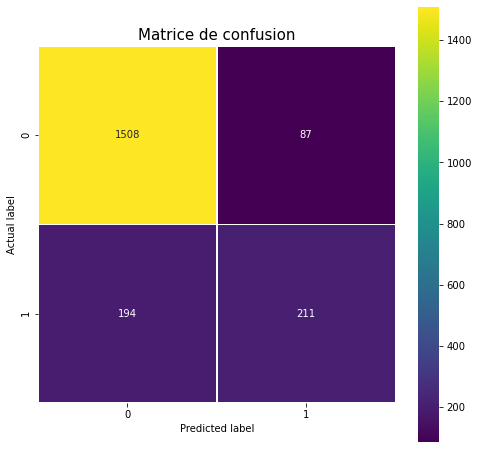

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)
score = metrics.accuracy_score(y_test,prediction)
print("L'accuracy est de : {}".format(score))

import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Matrice de confusion", size = 15)